Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 132)               264       
                                                                 
 dense_11 (Dense)            (None, 132)               17556     
                                                                 
 dense_12 (Dense)            (None, 132)               17556     
                                                                 
 dense_13 (Dense)            (None, 1)                 133       
                                                                 
Total params: 35509 (138.71 KB)
Trainable params: 35509 (138.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
3/3 [==============================] - 0s 3ms/step


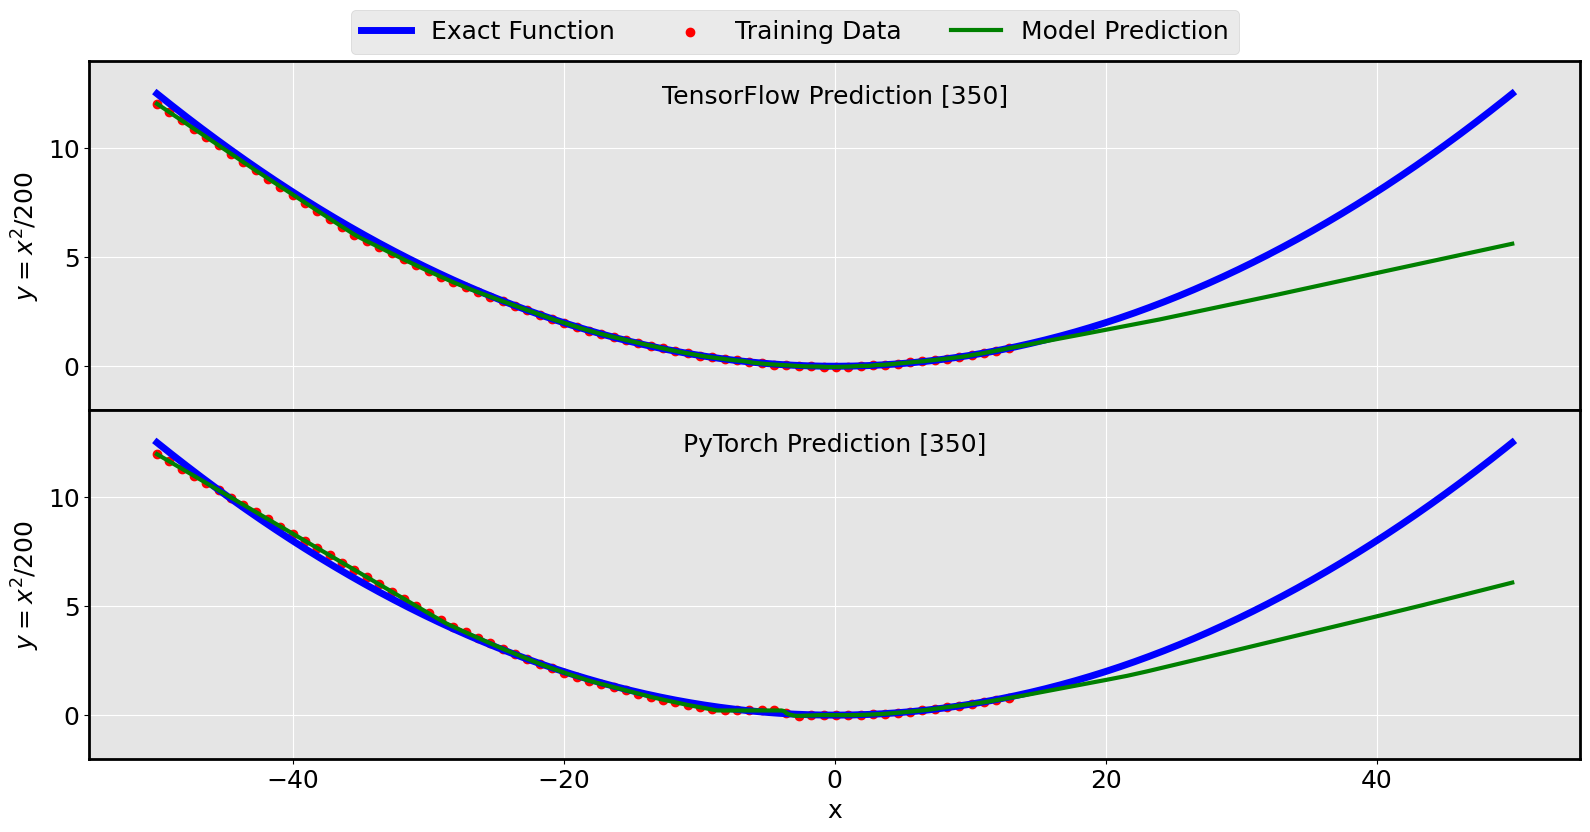

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tensorflow as tf

# Ensure compatibility with older versions of Intel MKL
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Set random seed for reproducibility
torch.manual_seed(123)

# Define the PyTorch model
class Model2dp(nn.Module):
    def __init__(self):
        super(Model2dp, self).__init__()
        self.layer1 = nn.Linear(1, 132)
        self.layer2 = nn.Linear(132, 132)
        self.layer3 = nn.Linear(132, 132)
        self.layer4 = nn.Linear(132, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x

# Initialize PyTorch model
model2dp = Model2dp()

# Load the PyTorch model state
state_dict = torch.load('C:/Users/Asus/trained_model2dp_x_2_200_Pytorch_350.pth')
model2dp.load_state_dict(state_dict)
model2dp.eval()

# Load the TensorFlow model
model2d = tf.keras.models.load_model('model2d_with_350_tensorflow.keras')
# Print TensorFlow model summary
model2d.summary() 

# Generate data for predictions
ndata = 550
x = np.linspace(-50, 50, ndata)
y = x**2 / 200
# Convert data to tensors
x_tensor_2= torch.tensor(x, dtype=torch.float32).unsqueeze(1)  
y_tensor_2= torch.tensor(y, dtype=torch.float32).unsqueeze(1)  
#x_data_tensor = torch.tensor(x[0:150:5], dtype=torch.float32).unsqueeze(1)  # Sliced data for PyTorch
train_data_350 = 350 
x_data_2= x[0:350:5]
y_data_2= y[0:350:5]
x_data_tensor_2 = torch.tensor(x_data_2, dtype=torch.float32)
y_data_tensor_2 = torch.tensor(y_data_2, dtype=torch.float32)

# Predict using the PyTorch model
with torch.no_grad():
    y_pred_pytorch_2 = model2dp(x_tensor_2).numpy()

    
   
    
# Predict using the TensorFlow model
y_pred_tensorflow_2 = model2d.predict(x)
# Create subplots
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)


# Plot PyTorch model predictions
axes[1].plot(x_tensor_2,y_tensor_2, color='blue', linewidth=5, label='Exact Function')

#------------------------ model (x data) dooooooooooooo ittttttttttttt

#axes[1].scatter(x_data_tensor_2,y_data_tensor_2 , color='red', linewidth=1, label='Training Data')
axes[1].scatter(x_data_tensor_2, model2dp(x_data_tensor_2.unsqueeze(1)).detach().numpy(), color='red', linewidth=1, label='Training Data')


axes[1].plot(x_tensor_2,y_pred_pytorch_2, color='green', linewidth=3, label='Model Prediction')
axes[1].set_ylabel('$y = x^2 / 200$',fontsize=18, color='black')
axes[1].set_xlabel('x',fontsize=18, color='black')
#axes[1].legend()
axes[1].legend().set_visible(False)

axes[1].grid(True)
#axes[1].set_title('PyTorch Predictions [150]')
#axes[1].set_xlim(-50, 50)  # Set x-axis limits
axes[1].set_ylim(-2, 14)
#axes[1].tick_params(axis='both', colors='black')
axes[1].tick_params(axis='both', colors='black', labelsize=18) 
# plt.setp(axes[1].get_xticklabels(), fontweight='bold')
# plt.setp(axes[1].get_yticklabels(), fontweight='bold')
# Add title inside the plot area
axes[1].text(0.5,0.90, 'PyTorch Prediction [350]', transform=axes[1].transAxes, 
             ha='center', va='center', fontsize=18)


# Plot TensorFlow model predictions
axes[0].plot(x, y, color='blue', linewidth=5, label='Exact Function')

#------------------------ model (x data) dooooooooooooo ittttttttttttt

axes[0].scatter(x_data_2,model2d.predict(x_data_2), color='red',linewidth=1, label='Training Data')

axes[0].plot(x,y_pred_tensorflow_2, color='green', linewidth=3, label='Model Prediction')

axes[0].set_ylabel('$y = x^2 / 200$',fontsize=18, color='black')
axes[0].set_xlabel('x',fontsize=18, color='black')
#axes[0].legend()
axes[0].legend().set_visible(False)
axes[0].grid(True)
#axes[0].set_title('TensorFlow Prediction [150]')
#axes[0].set_xlim(-50, 50)  # Set x-axis limits
axes[0].set_ylim(-2, 14)
#axes[0].tick_params(axis='both', colors='black')
axes[0].tick_params(axis='both', colors='black', labelsize=18) 

# Add title inside the plot area
# plt.setp(axes[0].get_xticklabels(), fontweight='bold')
# plt.setp(axes[0].get_yticklabels(), fontweight='bold')

axes[0].text(0.5, .90, 'TensorFlow Prediction [350]', transform=axes[0].transAxes, 
             ha='center', va='center', fontsize=18)

# Collect handles and labels for the legend from both subplots
handles, labels = [], []
for ax in axes:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in [l.get_label() for l in handles]:  # Avoid duplicate labels
            handles.append(handle)
            labels.append(label)

# Add a single legend at the top of the figure
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,1.05), fontsize=18, ncol=3)
#to add black boarder around plot 
for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2) 
# Adjust layout and save the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.00, top=0.97)  # Adjust top to fit the legend 
plt.savefig(f'Tensor_Pytorch_prediction_{train_data_350}.png',bbox_inches='tight', dpi=300)
plt.show()
plt.close()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 132)               264       
                                                                 
 dense_7 (Dense)             (None, 132)               17556     
                                                                 
 dense_8 (Dense)             (None, 132)               17556     
                                                                 
 dense_9 (Dense)             (None, 1)                 133       
                                                                 
Total params: 35509 (138.71 KB)
Trainable params: 35509 (138.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 16ms/step


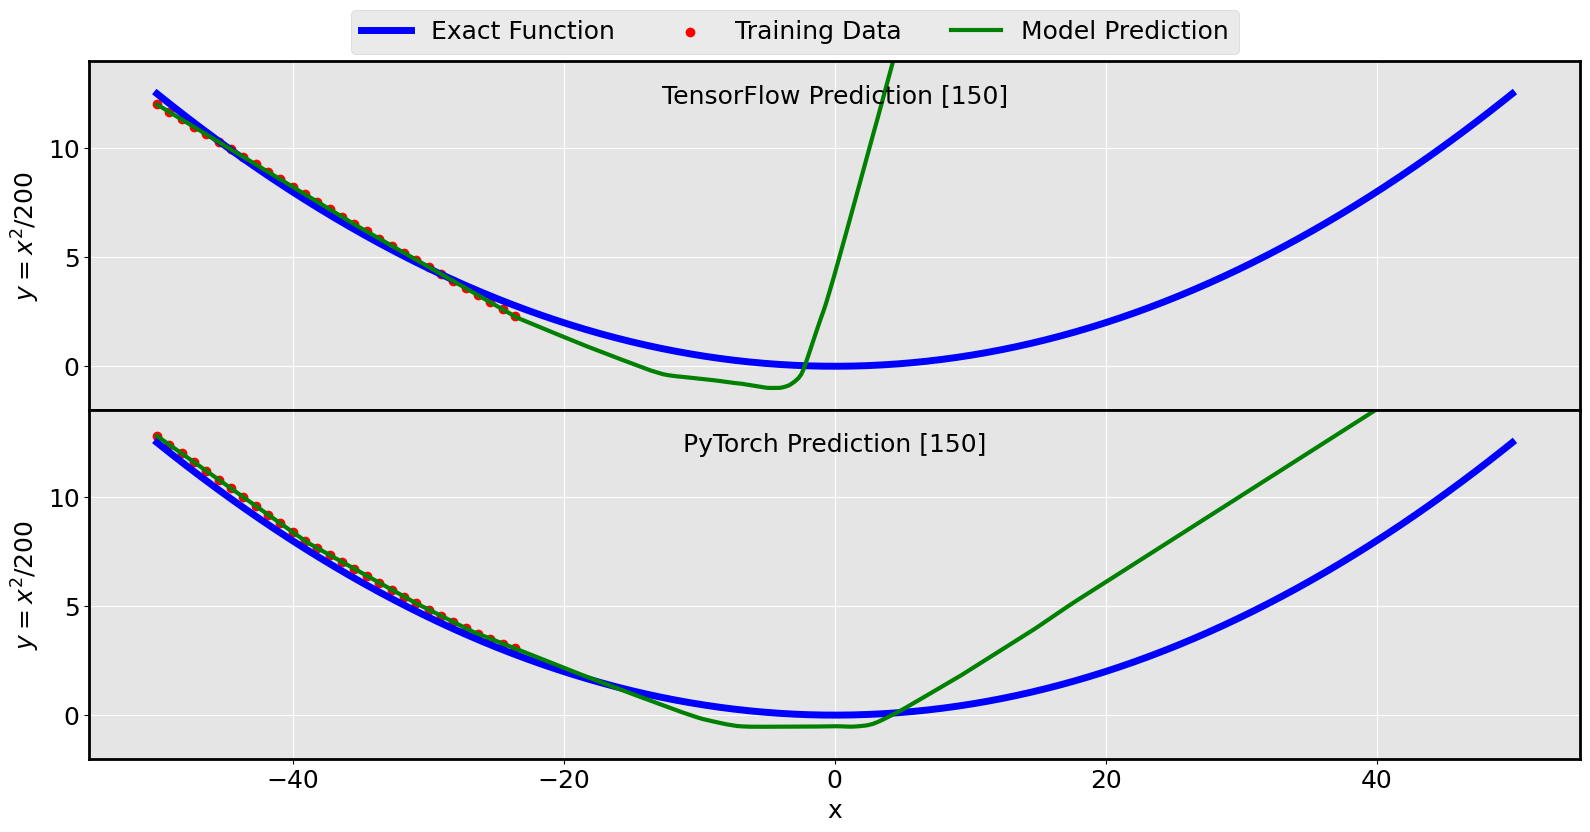

In [2]:
import os
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tensorflow as tf

# Ensure compatibility with older versions of Intel MKL
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Set random seed for reproducibility
torch.manual_seed(123)

# Define the PyTorch model
class Model2dp(nn.Module):
    def __init__(self):
        super(Model2dp, self).__init__()
        self.layer1 = nn.Linear(1, 132)
        self.layer2 = nn.Linear(132, 132)
        self.layer3 = nn.Linear(132, 132)
        self.layer4 = nn.Linear(132, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x

# Initialize PyTorch model
model2dp = Model2dp()

# Load the PyTorch model state
state_dict = torch.load('C:/Users/Asus/trained_model2dp_x_2_200_150_Pytorch.pth')
model2dp.load_state_dict(state_dict)
model2dp.eval()

# Load the TensorFlow model
model2d = tf.keras.models.load_model('model2d_with_150_tensorflow.keras')
# Print TensorFlow model summary
model2d.summary()

# Generate data for predictions
ndata = 550
x = np.linspace(-50, 50, ndata)
y = x**2 / 200
# # Convert data to tensors
# x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Add batch dimension
# x_data_tensor = torch.tensor(x[0:150:5], dtype=torch.float32).unsqueeze(1)  # Sliced data for PyTorch
# x_data = x[0:150:5]
# y_data = y[0:150:5]
# Convert data to tensors
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Add batch dimension
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1) 
x_data = x[0:150:5]
y_data = y[0:150:5]
x_data_tensor = torch.tensor(x_data, dtype=torch.float32)
y_data_tensor = torch.tensor(y_data, dtype=torch.float32)

data_slice = 150 
# Predict using the PyTorch model
with torch.no_grad():
    y_pred_pytorch = model2dp(x_tensor).numpy()

# Predict using the TensorFlow model
y_pred_tensorflow = model2d.predict(x)

# Create subplots
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Plot PyTorch model predictions
axes[1].plot(x_tensor, y_tensor, color='blue', linewidth=5, label='Exact Function')

#------------------------ model (x data) dooooooooooooo ittttttttttttt

#axes[1].scatter(x_data_tensor, y_data_tensor, color='red', linewidth=1, label='Training Data')

axes[1].scatter(x_data_tensor,  model2dp(x_data_tensor.unsqueeze(1)).detach().numpy(), color='red', linewidth=1, label='Training Data')



axes[1].plot(x_tensor,y_pred_pytorch, color='green', linewidth=3, label='Model Prediction')
axes[1].set_ylabel('$y = x^2 / 200$',fontsize=18, color='black')
axes[1].set_xlabel('x',fontsize=18, color='black')
#axes[1].legend()
axes[1].legend().set_visible(False)
axes[1].grid(True)
#axes[1].set_title('PyTorch Predictions [150]')
#axes[1].set_xlim(-50, 50)  # Set x-axis limits
axes[1].set_ylim(-2, 14)
#axes[1].tick_params(axis='both', colors='black')
axes[1].tick_params(axis='both', colors='black', labelsize=18) 
# plt.setp(axes[1].get_xticklabels(), fontweight='bold')
# plt.setp(axes[1].get_yticklabels(), fontweight='bold')
# Add title inside the plot area
axes[1].text(0.5,0.90, 'PyTorch Prediction [150]', transform=axes[1].transAxes, 
             ha='center', va='center', fontsize=18)


#------------------------ model (x data) dooooooooooooo ittttttttttttt

# Plot TensorFlow model predictions
axes[0].plot(x, y, color='blue', linewidth=5, label='Exact Function')
axes[0].scatter(x_data, model2d.predict(x_data), color='red',linewidth=1, label='Training Data')

axes[0].plot(x, y_pred_tensorflow, color='green', linewidth=3, label='Model Prediction')
axes[0].set_ylabel('$y = x^2 / 200$',fontsize=18, color='black')
axes[0].set_xlabel('x',fontsize=18, color='black')
#axes[0].legend()
axes[0].legend().set_visible(False)
axes[0].grid(True)
#axes[0].set_title('TensorFlow Prediction [150]')
#axes[0].set_xlim(-50, 50)  # Set x-axis limits
axes[0].set_ylim(-2, 14)
#axes[0].tick_params(axis='both', colors='black')
axes[0].tick_params(axis='both', colors='black', labelsize=18) 
# Add title inside the plot area
# plt.setp(axes[0].get_xticklabels(), fontweight='bold')
# plt.setp(axes[0].get_yticklabels(), fontweight='bold')

axes[0].text(0.5, .90, 'TensorFlow Prediction [150]', transform=axes[0].transAxes, 
             ha='center', va='center', fontsize=18)

# Collect handles and labels for the legend from both subplots
handles, labels = [], []
for ax in axes:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in [l.get_label() for l in handles]:  # Avoid duplicate labels
            handles.append(handle)
            labels.append(label)

# Add a single legend at the top of the figure
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,1.05), fontsize=18, ncol=3)


#to add black boarder around plot 
for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2) 
# Adjust layout and save the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.00, top=0.97)  # Adjust top to fit the legend 
plt.savefig(f'Tensor_Pytorch_prediction_{data_slice}.png',bbox_inches='tight', dpi=300)
plt.show()
plt.close()


In [3]:
# #To check which files avaible in the directory 
# import os
# checkpoint_dir = 'C:/Users/Asus/'
# files = os.listdir(checkpoint_dir)
# print(files)

['.anaconda', '.cache', '.cisco', '.conda', '.condarc', '.continuum', '.dwagent', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.ms-ad', '.spyder-py3', '1_exact_function_sinc_240_1d.png', '1_exact_function_x_2_200_Pytorch10_1d.png', '1_exact_function_x_2_200_TensorFlow550_1d.png', '28_8_24_NN_Sinc1.ipynb', '2d', '2_NN_prediction_sinc_240_epoch_1500_1d.png', '2_NN_prediction_sinc_240_epoch_3000_1d.png', '2_NN_prediction_sinc_240_epoch_4500_1d.png', '2_NN_prediction_sinc_240_epoch_6000_1d.png', '3D Objects', 'anaconda3', 'AppData', 'Application Data', 'Combined_Learning_Curve_Comparison_150.png', 'Contacts', 'Cookies', 'data', 'Documents', 'Downloads', 'example_code_for_plotting_figures.ipynb', 'Favorites', 'IntelGraphicsProfiles', 'Learning_Curve_Comparison_150.png', 'Links', 'loadingSincmodel_imagesmerge1.ipynb', 'Loading_tensorflow_pytorch_imagemerge1.ipynb', 'Local Settings', 'loss_per_epoch_350_Tensowflow.txt', 'loss_values_150_T.txt', 'loss_valu

PyTorch losses length: 600
PyTorch losses sample: [51.7097 11.57    1.755   2.3787  1.7815]
TensorFlow losses length: 600
TensorFlow losses sample: [5.59571171 3.9310472  2.22001338 1.85475969 2.0688529 ]


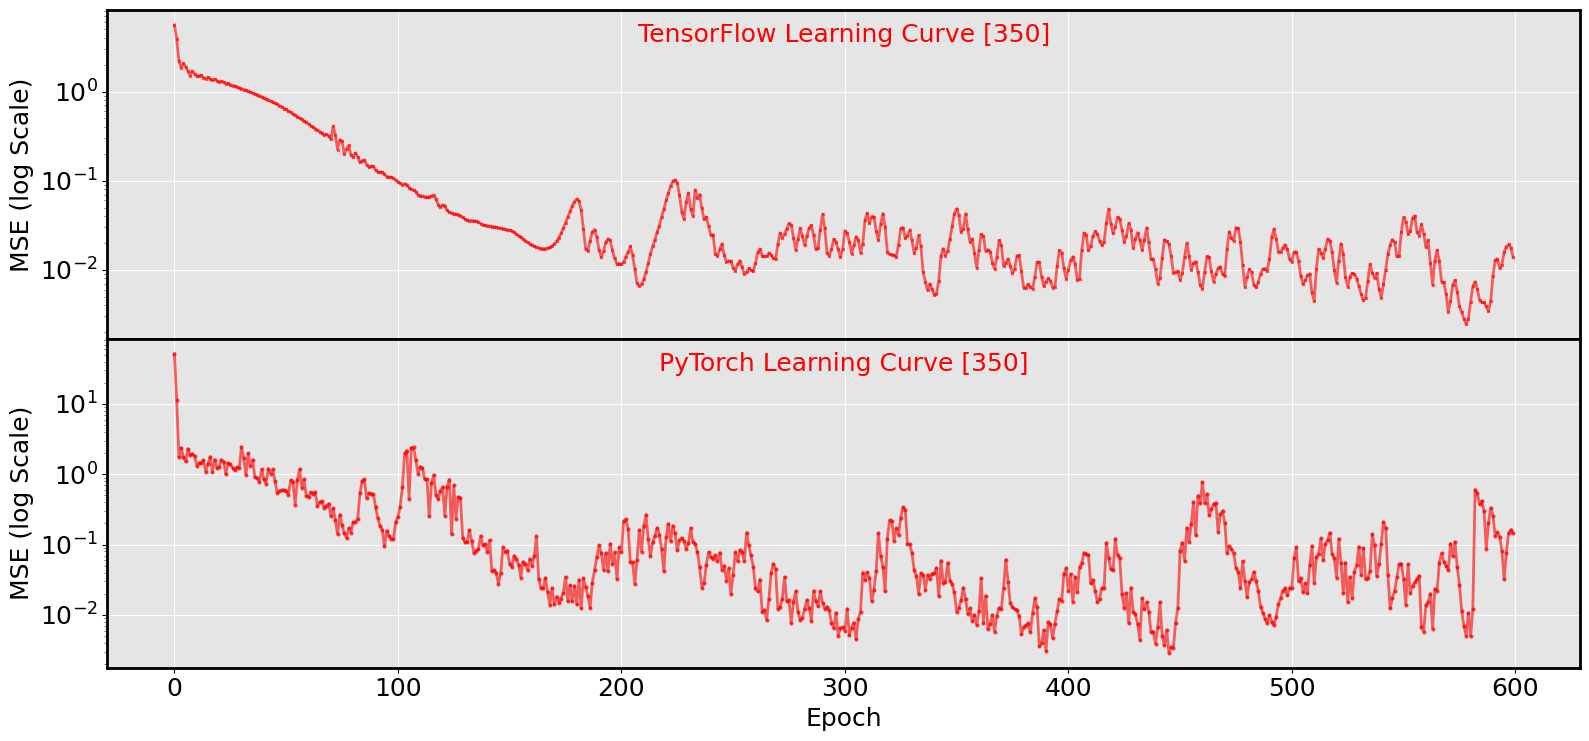

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to extract numeric values from the PyTorch file
def parse_pytorch_loss_file(filename):
    losses = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                if ':' in line:
                    _, value = line.split(':')
                    value = float(value.strip())
                else:
                    value = float(line.strip())
                losses.append(value)
            except ValueError:
                continue
    return np.array(losses)

# Define a function to extract numeric values from the TensorFlow file
def parse_tensorflow_loss_file(filename):
    losses = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                if ':' in line:
                    _, value = line.split(':')
                    value = float(value.strip())
                else:
                    value = float(line.strip())
                losses.append(value)
            except ValueError:
                continue
    return np.array(losses)

# Load loss values for PyTorch and TensorFlow
Pytorch_model2dp_losses_350 = parse_pytorch_loss_file('Pytorch_model2dp_losses_350.txt')
loss_values_350_T = parse_tensorflow_loss_file('loss_per_epoch_350_Tensowflow.txt')

# Debug: Print the lengths and first few values of the arrays
print("PyTorch losses length:", len(Pytorch_model2dp_losses_350))
print("PyTorch losses sample:", Pytorch_model2dp_losses_350[:5])
print("TensorFlow losses length:", len(loss_values_350_T))
print("TensorFlow losses sample:", loss_values_350_T[:5])

# Create a new figure with 2 rows and 1 column for subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# TensorFlow Learning Curve
if len(loss_values_350_T) > 0:
    axes[0].semilogy(range(len(loss_values_350_T)), loss_values_350_T, 
                     marker='x', markersize=2, linestyle='-', linewidth=2, alpha=0.6, color='red')
    axes[0].set_xlabel('Epoch', fontsize=18, color='black')
    axes[0].set_ylabel('MSE (log Scale)', fontsize=18, color='black')
    axes[0].tick_params(axis='both', colors='black', labelsize=18)
    axes[0].grid(True)
    axes[0].text(0.5, 0.96, 'TensorFlow Learning Curve [350]', transform=axes[0].transAxes, 
                 ha='center', va='top', fontsize=18, color='red')
else:
    axes[0].text(0.5, 0.5, 'No data available', horizontalalignment='center',
                 verticalalignment='center', fontsize=18, color='red')
    axes[0].set_xlabel('Epoch', fontsize=18, color='black')
    axes[0].set_ylabel('MSE (log Scale)', fontsize=18, color='black')
    axes[0].tick_params(axis='both', colors='black', labelsize=18)
    axes[0].text(0.5, 0.96, 'TensorFlow Learning Curve [350]', transform=axes[0].transAxes, 
                 ha='center', va='top', fontsize=18, color='red')

# PyTorch Learning Curve
if len(Pytorch_model2dp_losses_350) > 0:
    axes[1].semilogy(range(len(Pytorch_model2dp_losses_350)), Pytorch_model2dp_losses_350, 
                     marker='o', markersize=2, linestyle='-', linewidth=2, alpha=0.6, color='red')
    axes[1].set_xlabel('Epoch', fontsize=18, color='black')
    axes[1].set_ylabel('MSE (log Scale)', fontsize=18, color='black')
    axes[1].tick_params(axis='both', colors='black', labelsize=18)
    axes[1].grid(True)
    axes[1].text(0.5, 0.96, 'PyTorch Learning Curve [350]', transform=axes[1].transAxes, 
                 ha='center', va='top', fontsize=18, color='red')
else:
    axes[1].text(0.5, 0.5, 'No data available', horizontalalignment='center',
                 verticalalignment='center', fontsize=18, color='red')
    axes[1].set_xlabel('Epoch', fontsize=18, color='black')
    axes[1].set_ylabel('MSE (log Scale)', fontsize=18, color='black')
    axes[1].tick_params(axis='both', colors='black', labelsize=18)
    axes[1].text(0.5, 0.96, 'PyTorch Learning Curve [350]', transform=axes[1].transAxes, 
                 ha='center', va='top', fontsize=18, color='red')

# Add border around the subplot
for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)    

# Adjust layout and save the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.0, top=0.92)  # Adjusted spacing to accommodate labels
plt.savefig('Tensorflow_Pytorch_Learning_Curve_350.png', dpi=250)
plt.show()


PyTorch losses length: 600
PyTorch losses sample: [66.1301 95.7265  7.4294 29.5023 26.3687]
TensorFlow losses length: 600
TensorFlow losses sample: [ 78.14541626 409.99356079   2.85251331  54.50210953  65.36038971]


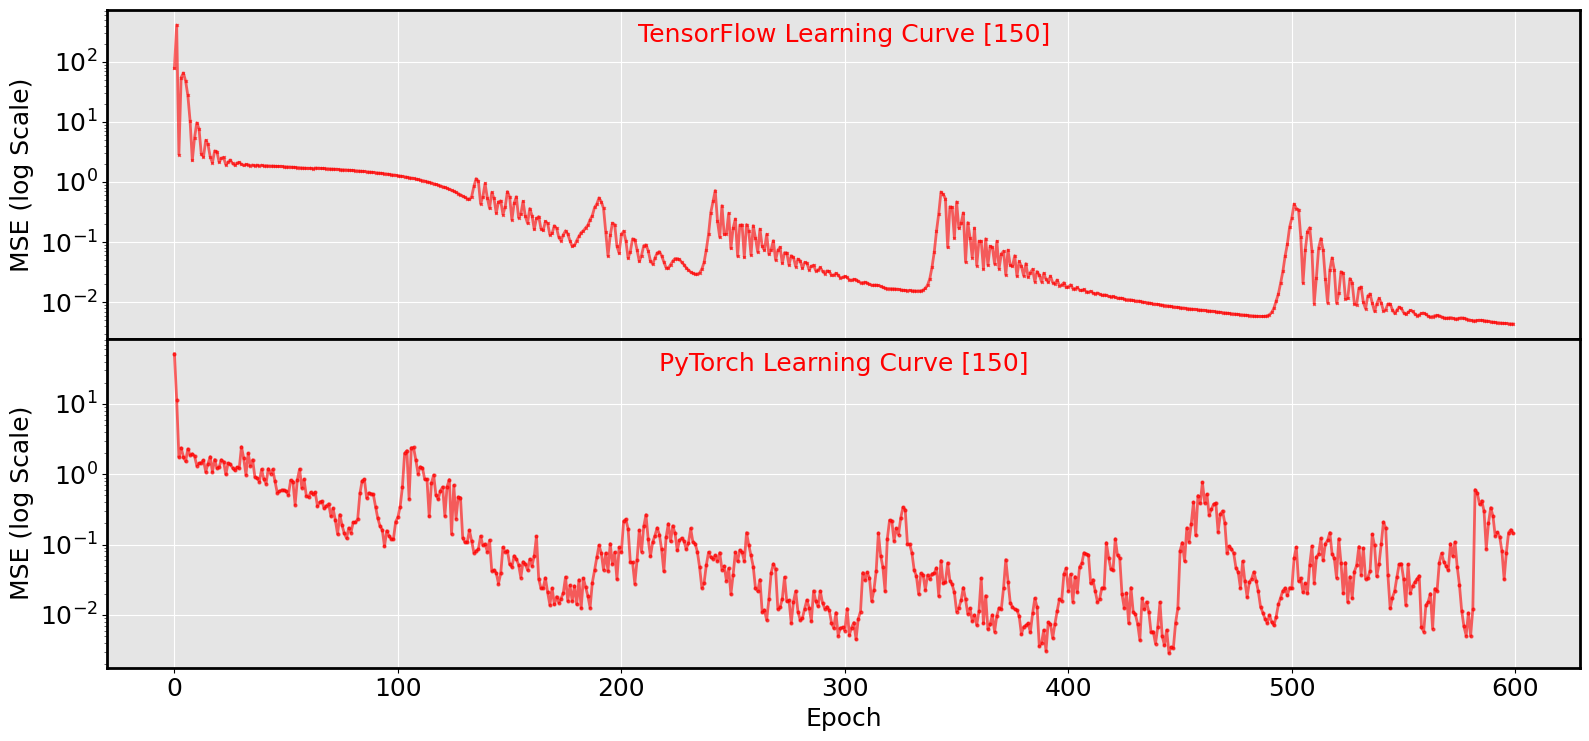

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to extract numeric values from the PyTorch file
def parse_pytorch_loss_file(filename):
    losses = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                if ':' in line:
                    _, value = line.split(':')
                    value = float(value.strip())
                else:
                    value = float(line.strip())
                losses.append(value)
            except ValueError:
                continue
    return np.array(losses)

# Define a function to extract numeric values from the TensorFlow file
def parse_tensorflow_loss_file(filename):
    losses = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                if ':' in line:
                    _, value = line.split(':')
                    value = float(value.strip())
                else:
                    value = float(line.strip())
                losses.append(value)
            except ValueError:
                continue
    return np.array(losses)

# Load loss values for PyTorch and TensorFlow
Pytorch_model2dp_losses_150 = parse_pytorch_loss_file('Pytorch_model2dp_losses_150.txt')
loss_values_150_T = parse_tensorflow_loss_file('loss_values_150_Tensorflow.txt')

# Debug: Print the lengths and first few values of the arrays
print("PyTorch losses length:", len(Pytorch_model2dp_losses_150))
print("PyTorch losses sample:", Pytorch_model2dp_losses_150[:5])
print("TensorFlow losses length:", len(loss_values_150_T))
print("TensorFlow losses sample:", loss_values_150_T[:5])

# Create a new figure with 2 rows and 1 column for subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# TensorFlow Learning Curve
if len(loss_values_150_T) > 0:
    axes[0].semilogy(range(len(loss_values_150_T)), loss_values_150_T, 
                     marker='x', markersize=2, linestyle='-', linewidth=2, alpha=0.6, color='red')
    axes[0].set_xlabel('Epoch', fontsize=18, color='black')
    axes[0].set_ylabel('MSE (log Scale)', fontsize=18, color='black')
    axes[0].tick_params(axis='both', colors='black', labelsize=18)
    axes[0].grid(True)
    axes[0].text(0.5, 0.96, 'TensorFlow Learning Curve [150]', transform=axes[0].transAxes, 
                 ha='center', va='top', fontsize=18, color='red')
else:
    axes[0].text(0.5, 0.5, 'No data available', horizontalalignment='center',
                 verticalalignment='center', fontsize=18, color='red')
    axes[0].set_xlabel('Epoch', fontsize=18, color='black')
    axes[0].set_ylabel('MSE (log Scale)', fontsize=18, color='black')
    axes[0].tick_params(axis='both', colors='black', labelsize=18)
    axes[0].text(0.5, 0.96, 'TensorFlow Learning Curve [150]', transform=axes[0].transAxes, 
                 ha='center', va='top', fontsize=18, color='red')

# PyTorch Learning Curve
if len(Pytorch_model2dp_losses_150) > 0:
    axes[1].semilogy(range(len(Pytorch_model2dp_losses_350)), Pytorch_model2dp_losses_350, 
                     marker='o', markersize=2, linestyle='-', linewidth=2, alpha=0.6, color='red')
    axes[1].set_xlabel('Epoch', fontsize=18, color='black')
    axes[1].set_ylabel('MSE (log Scale)', fontsize=18, color='black')
    axes[1].tick_params(axis='both', colors='black', labelsize=18)
    axes[1].grid(True)
    axes[1].text(0.5, 0.96, 'PyTorch Learning Curve [150]', transform=axes[1].transAxes, 
                 ha='center', va='top', fontsize=18, color='red')
else:
    axes[1].text(0.5, 0.5, 'No data available', horizontalalignment='center',
                 verticalalignment='center', fontsize=18, color='red')
    axes[1].set_xlabel('Epoch', fontsize=18, color='black')
    axes[1].set_ylabel('MSE (log Scale)', fontsize=18, color='black')
    axes[1].tick_params(axis='both', colors='black', labelsize=18)
    axes[1].text(0.5, 0.96, 'PyTorch Learning Curve [150]', transform=axes[1].transAxes, 
                 ha='center', va='top', fontsize=18, color='red')

# Add border around the subplot
for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)    

# Adjust layout and save the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.0, top=0.92)  # Adjusted spacing to accommodate labels
plt.savefig('Tensorflow_Pytorch_Learning_Curve_150.png', dpi=250)
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Define the file path
# filename = 'C:\\Users\\Asus\\loss_per_epoch_350_Tensowflow.txt'

# # Read data from the file
# try:
#     with open(filename, 'r') as file:
#         loss_per_epoch_350_Tensorflow = [float(line.strip()) for line in file]
# except FileNotFoundError:
#     print(f"Error: {filename} not found. Please check the file path.")
#     loss_per_epoch_350_Tensorflow = []  # Empty list if file is not found

# # Check the first few entries to ensure data is read correctly
# print("First few entries of the data:", loss_per_epoch_350_Tensorflow[:5])

# # Plotting the TensorFlow Learning Curve
# fig, ax = plt.subplots(figsize=(10, 6))

# if len(loss_per_epoch_350_Tensorflow) > 0:
#     ax.semilogy(range(len(loss_per_epoch_350_Tensorflow)), loss_per_epoch_350_Tensorflow, 
#                 marker='x', markersize=2, linestyle='-', linewidth=2, alpha=0.6, color='red')
#     ax.set_xlabel('Epoch', fontsize=14)
#     ax.set_ylabel('Loss', fontsize=14)
#     ax.set_title('TensorFlow Learning Curve', fontsize=16)
# else:
#     print("No data to plot.")

# plt.show()


In [ ]:
# import tensorflow as tf
# # Load the saved model
# model2d= tf.keras.models.load_model('model2d_with_150_tensorflow.keras')
# # Print the model summary to verify it was loaded correctly
# model2d.summary()

In [ ]:
# ndata = 550
# x = np.linspace(-50, 50, ndata)
# y = x**2 / 200
# step_L_R = 10
# n = len(x)  # Number of data points
# # Convert to PyTorch tensors
# x_tensor = torch.tensor(x, dtype=torch.float32)
# y_tensor = torch.tensor(y, dtype=torch.float32)

# #----------------------------------------------------------150-------------------------------------------

# # Define the sliced data
# x_data = x[0:150:5]
# y_data = y[0:150:5] 

# #Slice_data = 150
# # Convert sliced data to PyTorch tensors
# x_data_tensor = torch.tensor(x_data, dtype=torch.float32)
# y_data_tensor = torch.tensor(y_data, dtype=torch.float32)


In [ ]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
# # Pytorch 
# import torch
# import numpy as np
# import torch.nn as nn
# import matplotlib.pyplot as plt
# # Tensorflow 
# import tensorflow as tf
# from tensorflow.keras.models import load_model 
# # Ensure reproducibility
# torch.manual_seed(123) # For Pytorch 
# tf.random.set_seed(42) # For Tensorflow 


# # # Plotting
# # plt.style.use('ggplot')
# # fig, axes = plt.subplots(2, 1, figsize=(14, 4), sharex=True, sharey=True)

# # Plot PyTorch model predictions
# axes[0].plot(x, x**2 / 200, color="tab:blue", linewidth=5, label="Exact Function")
# axes[0].scatter(x, y_pred_pytorch, alpha=0.6, color='red', lw=1, label="Training data")
# axes[0].plot(x, y_pred_pytorch, color='green', lw=3, label="Neural network prediction")
# #axes[0].set_title("PyTorch Model", fontsize=18)
# axes[0].set_ylabel('$y = x^2/200$', fontsize=16 )
# axes[0].tick_params(axis='both', labelsize=16, colors='black')
# axes[0].grid(True)


# # Add title inside the PyTorch subplot
# axes[0].text(0.5, 0.95, "PyTorch Model", horizontalalignment='center', verticalalignment='top',
#              transform=axes[0].transAxes, fontsize=15, bbox=dict(facecolor='white', alpha=0.7))

# # Plot TensorFlow model predictions
# axes[1].plot(x, x**2 / 200, color="tab:blue", linewidth=5, label="Exact Function")
# axes[1].scatter(x, y_pred_tensorflow, alpha=0.6, color='red', lw=1, label="Training data")
# axes[1].plot(x, y_pred_tensorflow, color='green', lw=3, label="Neural network prediction")
# #axes[1].set_title("TensorFlow Model", fontsize=18)
# axes[1].set_xlabel('x', fontsize=16)
# axes[1].tick_params(axis='both', labelsize=16, colors='black')
# axes[1].grid(True)

# # # Add title inside the TensorFlow subplot
# # axes[1].text(0.5, 0.95, "TensorFlow Model", horizontalalignment='center', verticalalignment='top',
# #              transform=axes[1].transAxes, fontsize=15,bbox=dict(facecolor='white', alpha=0.7))


# # # Collect handles and labels for the legend from both subplots
# # handles, labels = [], []
# # for ax in axes:
# #     for handle, label in zip(*ax.get_legend_handles_labels()):
# #         if label not in [l.get_label() for l in handles]:  # Avoid duplicate labels
# #             handles.append(handle)
# #             labels.append(label)

# # # Add a single legend at the top of the figure
# # fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), fontsize=14, ncol=3)

# # # Adjust layout
# # plt.subplots_adjust(hspace=0.0, top=0.96)  # Adjust top to fit the legend
# # plt.savefig('Tensorflow_vs_pytorch.png', dpi=300)
# # plt.show()
# # plt.close()


In [ ]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
# # Pytorch 
# import torch
# import numpy as np
# import torch.nn as nn
# import matplotlib.pyplot as plt
# # Tensorflow 
# import tensorflow as tf
# from tensorflow.keras.models import load_model 
# # Ensure reproducibility
# torch.manual_seed(123) # For Pytorch 
# tf.random.set_seed(42) # For Tensorflow 


# # Define the input data
# x = np.linspace(-10, 10, 500).reshape(-1, 1)
# x_tensor = torch.tensor(x, dtype=torch.float32)
# x_tf = np.array(x)

# # Define and load the PyTorch model
# class ModelWithoutActivation(nn.Module):
#     def __init__(self):
#         super(ModelWithoutActivation, self).__init__()
#         self.layer1 = nn.Linear(1, 32)
#         self.layer2 = nn.Linear(32, 1)

#     def forward(self, x):
#         x = self.layer1(x)
#         x = self.layer2(x)
#         return x

# # Load the PyTorch model
# pytorch_model = ModelWithoutActivation()
# pytorch_model.load_state_dict(torch.load('trained_model1(withoutactivationfunction)_x_2_200_Pytorch.pth'))
# pytorch_model.eval()

# # Load the TensorFlow model
# tensorflow_model = tf.keras.models.load_model('model1_withoutactivationfunction_tensorflow.keras')

# # Generate predictions
# with torch.no_grad():
#     y_pred_pytorch = pytorch_model(x_tensor).numpy()

# y_pred_tensorflow = tensorflow_model.predict(x_tf)

# # Plotting
# plt.style.use('ggplot')
# fig, axes = plt.subplots(2, 1, figsize=(14, 4), sharex=True, sharey=True)

# # Plot PyTorch model predictions
# axes[0].plot(x, x**2 / 200, color="tab:blue", linewidth=5, label="Exact Function")
# axes[0].scatter(x, y_pred_pytorch, alpha=0.6, color='red', lw=1, label="Training data")
# axes[0].plot(x, y_pred_pytorch, color='green', lw=3, label="Neural network prediction")
# #axes[0].set_title("PyTorch Model", fontsize=18)
# axes[0].set_ylabel('$y = x^2/200$', fontsize=16 )
# axes[0].tick_params(axis='both', labelsize=16, colors='black')
# axes[0].grid(True)


# # Add title inside the PyTorch subplot
# axes[0].text(0.5, 0.95, "PyTorch Model", horizontalalignment='center', verticalalignment='top',
#              transform=axes[0].transAxes, fontsize=15, bbox=dict(facecolor='white', alpha=0.7))

# # Plot TensorFlow model predictions
# axes[1].plot(x, x**2 / 200, color="tab:blue", linewidth=5, label="Exact Function")
# axes[1].scatter(x, y_pred_tensorflow, alpha=0.6, color='red', lw=1, label="Training data")
# axes[1].plot(x, y_pred_tensorflow, color='green', lw=3, label="Neural network prediction")
# #axes[1].set_title("TensorFlow Model", fontsize=18)
# axes[1].set_xlabel('x', fontsize=16)
# axes[1].tick_params(axis='both', labelsize=16, colors='black')
# axes[1].grid(True)

# # Add title inside the TensorFlow subplot
# axes[1].text(0.5, 0.95, "TensorFlow Model", horizontalalignment='center', verticalalignment='top',
#              transform=axes[1].transAxes, fontsize=15,bbox=dict(facecolor='white', alpha=0.7))


# # Collect handles and labels for the legend from both subplots
# handles, labels = [], []
# for ax in axes:
#     for handle, label in zip(*ax.get_legend_handles_labels()):
#         if label not in [l.get_label() for l in handles]:  # Avoid duplicate labels
#             handles.append(handle)
#             labels.append(label)

# # Add a single legend at the top of the figure
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), fontsize=14, ncol=3)

# # Adjust layout
# plt.subplots_adjust(hspace=0.0, top=0.96)  # Adjust top to fit the legend
# plt.savefig('Tensorflow_vs_pytorch.png', dpi=300)
# plt.show()
# plt.close()
